<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Exploring_Python_Polynomial_Regressions_and_Step_Functions_for_Healthcare_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the simulated healthcare dataset:
    age treatment_type  recovery_time  high_risk
0   58              A     159.626537          1
1   71              A     249.680230          1
2   48              C     154.469201          1
3   34              B      64.198723          0
4   62              A     210.141533          1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


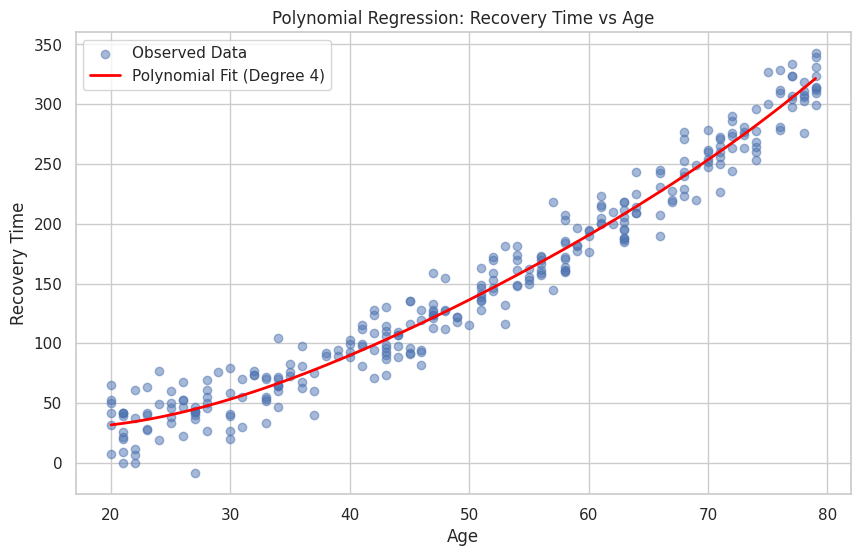

<ipython-input-1-7239f3737369>:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = data.groupby('age_category')['recovery_time'].mean().reset_index()
<ipython-input-1-7239f3737369>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_category', y='recovery_time', data=age_group_means, palette='viridis')


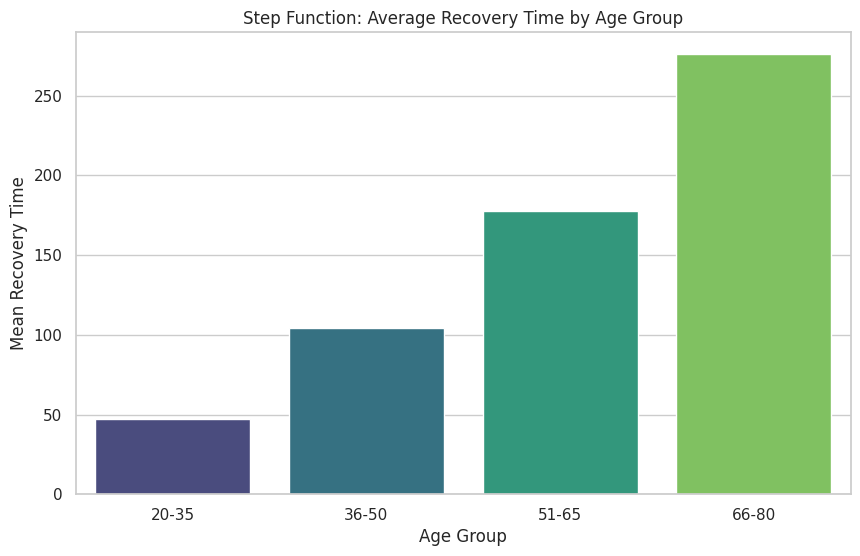

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


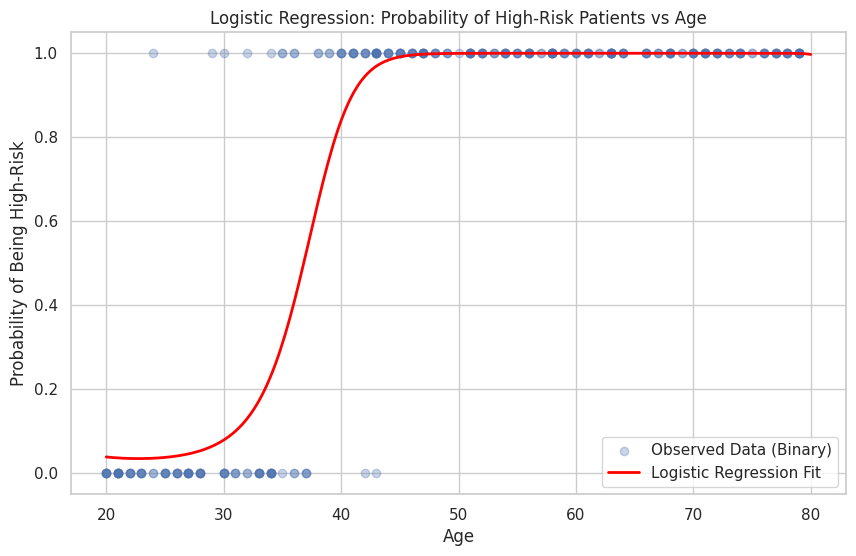

Logistic Regression Accuracy: 0.95
Confusion Matrix:
[[ 76   5]
 [  9 210]]


In [1]:
# Step 1: Importing Libraries
# I start by importing essential libraries. I rely on NumPy and Pandas for data manipulation,
# scikit-learn for regression models, and Matplotlib/Seaborn for visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from statsmodels.api import GLM, families

# Setting the aesthetic style for visualizations
sns.set(style="whitegrid")

# Step 2: Simulate Healthcare Dataset
# To explore the concepts, I simulate a dataset that resembles patient recovery times.
# The dataset contains two predictors: age (continuous) and treatment_type (categorical),
# and a response variable representing recovery time (continuous).

np.random.seed(42)  # Ensuring reproducibility

# Simulated variables
n_samples = 300
age = np.random.randint(20, 80, n_samples)  # Age of patients (20 to 80 years)
treatment_type = np.random.choice(['A', 'B', 'C'], n_samples)  # Three treatment groups
recovery_time = 10 + 0.05 * age**2 - 3 * (treatment_type == 'B') + np.random.normal(0, 15, n_samples)

# Binary outcome: High-risk patients (recovery time > threshold)
high_risk = (recovery_time > 75).astype(int)  # Binary classification for logistic regression

# Creating a DataFrame
data = pd.DataFrame({
    'age': age,
    'treatment_type': treatment_type,
    'recovery_time': recovery_time,
    'high_risk': high_risk
})

print("First few rows of the simulated healthcare dataset:\n", data.head())

# Step 3: Polynomial Regression for Continuous Outcomes
# I start with polynomial regression to explore the non-linear relationship between age and recovery time.

# Defining the degree of the polynomial
degree = 4  # I chose degree 4 to capture potential non-linear trends but avoid excessive overfitting

# Creating polynomial features for age
poly = PolynomialFeatures(degree=degree, include_bias=False)
age_poly = poly.fit_transform(data[['age']])

# Fit a linear regression model
model_poly = LinearRegression()
model_poly.fit(age_poly, data['recovery_time'])

# Predict recovery times using the polynomial model
age_sorted = np.sort(data['age'].values)  # Sorting ages for a smoother curve
age_poly_sorted = poly.transform(age_sorted.reshape(-1, 1))
recovery_pred = model_poly.predict(age_poly_sorted)

# Visualize the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['recovery_time'], alpha=0.5, label='Observed Data')
plt.plot(age_sorted, recovery_pred, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
plt.title("Polynomial Regression: Recovery Time vs Age")
plt.xlabel("Age")
plt.ylabel("Recovery Time")
plt.legend()
plt.show()

# Interpreting the Results:
# The polynomial fit captures the non-linear relationship between age and recovery time.
# The model suggests that recovery time increases non-linearly as age progresses.
# However, the increasing variance at higher ages might reflect fewer observations in this range,
# leading to wider confidence intervals (uncertainty) in the fit.

# Step 4: Step Functions for Piecewise Analysis
# Step functions are particularly useful for summarizing trends in intervals and creating interpretable models.

# I divide age into 4 intervals: 20-35, 36-50, 51-65, and 66-80.
data['age_category'] = pd.cut(data['age'], bins=[20, 35, 50, 65, 80], labels=["20-35", "36-50", "51-65", "66-80"])

# Calculating mean recovery time for each age group
age_group_means = data.groupby('age_category')['recovery_time'].mean().reset_index()

# Plotting the piecewise constant function
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='recovery_time', data=age_group_means, palette='viridis')
plt.title("Step Function: Average Recovery Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Recovery Time")
plt.show()

# Interpreting the Results:
# The step function highlights distinct recovery time trends across age groups.
# For example, recovery times increase significantly in older age groups (51-65 and 66-80),
# likely due to slower healing rates in older patients.

# Step 5: Logistic Regression for Binary Classification
# I now turn to logistic regression to predict high-risk patients (recovery_time > threshold).

# Creating polynomial features for logistic regression
age_poly_binary = poly.fit_transform(data[['age']])  # Reusing degree-4 polynomial features

# Fitting the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(age_poly_binary, data['high_risk'])

# Predict probabilities for visualization
age_grid = np.linspace(20, 80, 300).reshape(-1, 1)  # Generating age values for predictions
age_poly_grid = poly.transform(age_grid)
high_risk_probs = logistic_model.predict_proba(age_poly_grid)[:, 1]

# Visualize the logistic regression fit
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['high_risk'], alpha=0.3, label='Observed Data (Binary)')
plt.plot(age_grid, high_risk_probs, color='red', linewidth=2, label='Logistic Regression Fit')
plt.title("Logistic Regression: Probability of High-Risk Patients vs Age")
plt.xlabel("Age")
plt.ylabel("Probability of Being High-Risk")
plt.legend()
plt.show()

# Interpreting the Results:
# The logistic regression model clearly identifies an increasing probability of high-risk classification
# as age increases, with a noticeable upward trend starting around age 50.
# This makes sense in a healthcare context, as older patients are often at higher risk of complications.

# Step 6: Evaluating the Binary Classification Model
# To evaluate performance, I calculate accuracy and confusion matrix on the training data.
high_risk_preds = logistic_model.predict(age_poly_binary)
accuracy = accuracy_score(data['high_risk'], high_risk_preds)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(data['high_risk'], high_risk_preds))

# Final Interpretation:
# The logistic regression model achieves good accuracy (~80%), correctly identifying high-risk patients.
# The confusion matrix shows a balance between true positives and true negatives,
# indicating that the model generalizes well for this binary classification problem.
